<a href="https://colab.research.google.com/github/Graviton12/CS-430-Group-Project/blob/main/2021_Cherokee_Invasive_Survey_EDA_samia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cherokee Park 2021 Invasive Survey Exploratory Data Analysis
## CS-430 Machine Learning in the Cloud
### Ty Johnson, Samia Mahmood, Tyler Lericos, and Chase Hall

## Data Preprocessing - 2021 Data

In [18]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# loading dataset
# using skiprows=1 to skip the first row of the dataset
dataset=pd.read_excel("/content/drive/MyDrive/CS 430 Group Project/olmstead_dataset.xlsx", sheet_name="2021 Cherokee Invasive Survey", skiprows=1)

### Understanding the Dataset

In [20]:
# viewing dataset
dataset.head(7)

,Trimble\nStation,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Canopy,Understory,Lonicera japonica,...,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present
0,1,37,5,23,90.0,40.30,59.70,"Cherry, sassafrass, maple, hackberry, walnutash","Box elder, sugar maple saplings",2,...,0,3,0,0,0,1,3,0,0,1.0
1,2,8,4,3,5.0,5.20,94.80,"Cherry, black locust, ash, sugar maple, tulip ...","Sugar maple, ash, redbud, box elder,",1,...,0,4,0,0,0,2,1,0,0,0.0
2,3,10,6,13,17.0,11.96,88.04,"Tilia basswood, n red oak, maple, pin oak, hic...","Holly, maple saplings, ash saplings, buckeye",1,...,0,4,0,0,0,2,1,0,0,0.0
3,4,6,3,8,3.0,5.20,94.80,"Elm, cottonwood, walnut, sycamore, ironwood","Box elder, redbud, ash saplings",1,...,0,3,0,0,0,3,3,0,0,0.0
4,5,25,23,30,22.0,26.00,74.00,Basswood locust red oak ash?,Buckeye Spicebush ash sapling,3,...,1,3,0,0,1,1,3,0,0,0.0
5,6,13,6,16,8.0,11.18,88.82,Sycamore hackberry box elder cherry plane tree?,Box elder saplings elderberry ash saplings red...,3,...,1,4,0,0,1,1,4,1,0,2.0
6,8,3,0,5,0.0,2.08,97.92,"Maple, walnut, hackberry,","Ash saplings, box elder,",1,...,2,4,0,0,4,0,2,1,0,0.0


In [21]:
# checking the datatypes for each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Trimble
Station                            164 non-null    int64  
 1   N                                          164 non-null    int64  
 2   E                                          164 non-null    int64  
 3   S                                          164 non-null    int64  
 4   W                                          163 non-null    float64
 5   Calculated using formula in densiometer    164 non-null    float64
 6   Calculated using formula in densiometer.1  164 non-null    float64
 7   Canopy                                     164 non-null    object 
 8   Understory                                 164 non-null    object 
 9   Lonicera japonica                          164 non-null    int64  
 10  Microstegium vimineum     

In [22]:
# Viewing the summary statistics for the dataset
dataset.describe()

,Trimble\nStation,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Lonicera japonica,Microstegium vimineum,Euonymus alatus,...,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present
count,164.000000,164.000000,164.000000,164.000000,163.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.0,164.000000,164.000000,164.000000,164.000000,164.000000,157.000000
mean,87.518293,11.524390,12.054878,11.445122,11.122699,11.983252,88.016748,1.378049,0.591463,0.195122,...,0.207317,2.719512,0.085366,0.0,0.640244,1.170732,1.646341,0.231707,0.060976,0.592357
std,49.725192,13.397395,16.550445,15.284722,15.919463,13.166574,13.166574,1.199593,1.001925,0.574275,...,0.704722,1.284876,0.524287,0.0,0.952151,1.304122,1.037599,0.526565,0.326632,1.073906
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.760000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.750000,3.000000,3.000000,3.000000,3.000000,4.095000,85.635000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,87.500000,8.000000,6.500000,7.000000,6.000000,7.800000,92.200000,1.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,130.250000,15.250000,13.000000,12.000000,13.000000,14.365000,95.905000,2.000000,1.000000,0.000000,...,0.000000,4.000000,0.000000,0.0,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000
max,173.000000,94.000000,96.000000,92.000000,96.000000,97.240000,100.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,0.0,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000


In [23]:
# renaming columns
dataset = dataset.rename(columns={'Trimble\nStation':'Trimble_station', 'Calculated using formula in densiometer':'average_canopy_cover', 'Calculated using formula in densiometer.1':'form_densiometer.1'})

In [24]:
# checking if columns were renamed
dataset

,Trimble_station,N,E,S,W,average_canopy_cover,form_densiometer.1,Canopy,Understory,Lonicera japonica,...,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present
0,1,37,5,23,90.0,40.30,59.70,"Cherry, sassafrass, maple, hackberry, walnutash","Box elder, sugar maple saplings",2,...,0,3,0,0,0,1,3,0,0,1.0
1,2,8,4,3,5.0,5.20,94.80,"Cherry, black locust, ash, sugar maple, tulip ...","Sugar maple, ash, redbud, box elder,",1,...,0,4,0,0,0,2,1,0,0,0.0
2,3,10,6,13,17.0,11.96,88.04,"Tilia basswood, n red oak, maple, pin oak, hic...","Holly, maple saplings, ash saplings, buckeye",1,...,0,4,0,0,0,2,1,0,0,0.0
3,4,6,3,8,3.0,5.20,94.80,"Elm, cottonwood, walnut, sycamore, ironwood","Box elder, redbud, ash saplings",1,...,0,3,0,0,0,3,3,0,0,0.0
4,5,25,23,30,22.0,26.00,74.00,Basswood locust red oak ash?,Buckeye Spicebush ash sapling,3,...,1,3,0,0,1,1,3,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,169,38,5,25,4.0,18.72,81.28,"Ash, oak, butternut hickory, sugar maple, buck...","Buckeye, cercis, black cherry, dogwood, junipe...",0,...,0,4,0,0,0,2,4,0,0,1.0
160,170,21,39,44,19.0,31.98,68.02,"Osageorange, chinkapin oak, ash, tilia, sugar ...","Hackberry, cercis, ash, oak, maple, juniper, elm",0,...,0,0,0,0,0,0,4,0,1,1.0
161,171,28,9,26,34.0,25.22,74.78,"Oak sp, ash, sycamore","Sugar maple, ash, juniper, cercis, butternut h...",4,...,0,4,0,0,0,0,2,2,0,2.0
162,172,29,39,7,11.0,22.36,77.64,"Ailanthus, cercis, buckeye, sugar maple, Cornu...","Bladdernut, juniper, lonicera, ash",2,...,0,3,0,0,0,0,4,0,2,1.0


In [25]:
dataset.columns

Index(['Trimble_station', 'N', 'E', 'S', 'W', 'average_canopy_cover',
       'form_densiometer.1', 'Canopy', 'Understory', 'Lonicera japonica',
       'Microstegium vimineum', 'Euonymus alatus',
       'Ampelopsis brevipedunculata', 'Morus alba', 'Celastrus orbiculatus',
       'Vinca minor', 'Euonymus fortunei', 'Akebia quinata',
       'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii',
       'Privet/ Ligustrum', 'Ailanthus',
       'Canopy gap and/or downed trees present'],
      dtype='object')

In [26]:
# deleting uneeded columns
dataset = dataset.drop(['N', 'E', 'S', 'W', 'Canopy gap and/or downed trees present', 'Canopy', 'Understory'], axis=1)

In [27]:
# checking for any missing values
dataset.isna().sum()

,0
Trimble_station,0
average_canopy_cover,0
form_densiometer.1,0
Lonicera japonica,0
Microstegium vimineum,0
Euonymus alatus,0
Ampelopsis brevipedunculata,0
Morus alba,0
Celastrus orbiculatus,0
Vinca minor,0


## EDA Questions

### Do a majority of the invasive species occur frequently? Meaning, is there a major presence of invasive species?


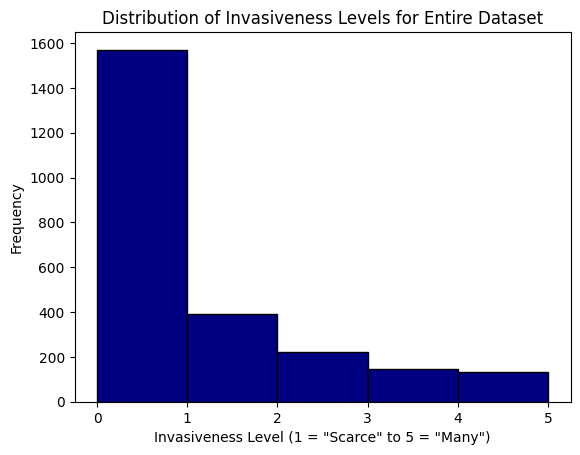

In [28]:
# creating histogram for the distribution of invaseness levels

# focusing on the tree species columns from the dataset
invasiveness_values = dataset[['Lonicera japonica', 'Microstegium vimineum', 'Euonymus alatus', 'Ampelopsis brevipedunculata', 'Morus alba', 'Celastrus orbiculatus',
                               'Vinca minor', 'Euonymus fortunei', 'Akebia quinata', 'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii', 'Privet/ Ligustrum',
                               'Ailanthus',]].values.flatten()

# plotting the histogram
plt.hist(invasiveness_values, bins=5, color='navy', edgecolor='black')

# setting the title
plt.title('Distribution of Invasiveness Levels for Entire Dataset')
# setting the x label
plt.xlabel('Invasiveness Level (1 = "Scarce" to 5 = "Many")')
plt.xticks(np.arange(0,6))
# setting the y label
plt.ylabel('Frequency')

# displaying plot
plt.show()

The histogram shows that for the invasive species in the 2021 Cherokee Invasive Survey dataset as a whole, the majority of the occurances of these invasive speces were within the "scarce" level while the fewest number of occurences were within the "many" level. This implies that for the invasise species in Cherokee park in 2021, the occruances of seeing these invasive species is mostly scarce. This is potienlly a good sign as it shows that a majority of the invasive species do not occur very frequently.

### For all invasive species in the dataset, which invasive species occur most freuquently and may pose the greatest threat?

In [29]:
# creatig a copy of the dataset but only focusing on the invasive species rows
invasive_species_dataset = dataset.iloc[:,3:23]
#invasive_species_dataset

# adding a row to the dataet which sums the values for each invasise species and sorting it from greatest to smallest
invasive_species_sum = invasive_species_dataset.sum().sort_values(ascending=True)
invasive_species_dataset.loc['sum'] = invasive_species_sum
invasive_species_dataset

,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
0,2,1,0,3,1,2,0,3,0,0,0,1,3,0,0
1,1,0,0,0,0,0,0,4,0,0,0,2,1,0,0
2,1,0,0,0,0,0,0,4,0,0,0,2,1,0,0
3,1,0,0,3,0,0,0,3,0,0,0,3,3,0,0
4,3,0,0,3,0,0,1,3,0,0,1,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0,0,3,0,0,0,0,0,0,0,0,4,0,1
161,4,0,2,0,0,0,0,4,0,0,0,0,2,2,0
162,2,0,1,0,0,3,0,3,0,0,0,0,4,0,2
163,2,1,1,4,4,0,0,3,0,0,0,1,2,1,0


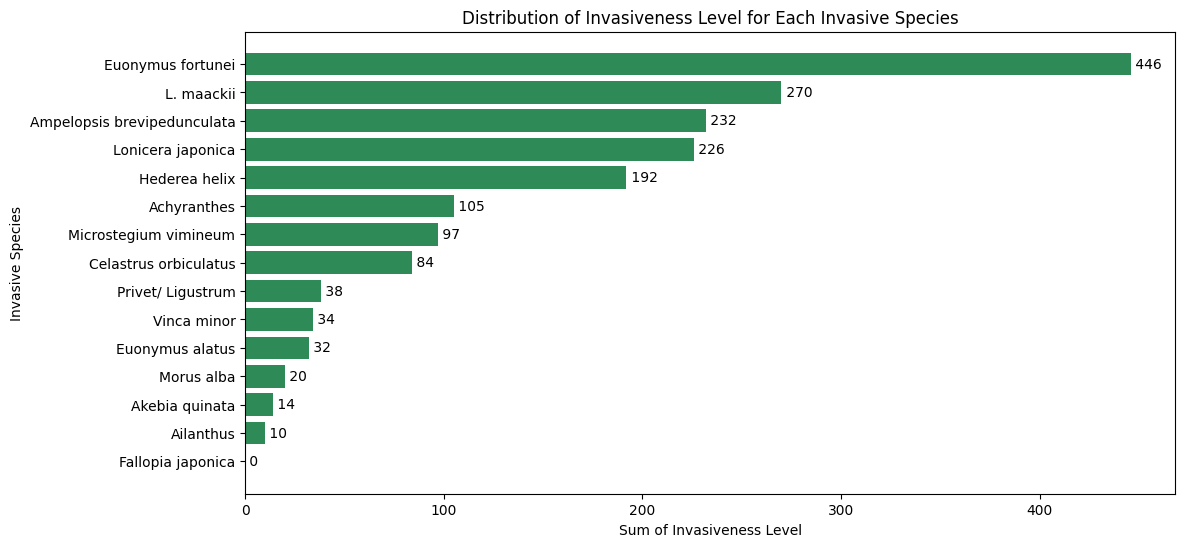

In [30]:
plt.figure(figsize=(12, 6))

# creating a bar graph to display the invasive level for each invasive species using the sum row
bar_graph = plt.barh(invasive_species_sum.index, invasive_species_sum.values, color='seagreen')

plt.title('Distribution of Invasiveness Level for Each Invasive Species')
plt.xlabel('Sum of Invasiveness Level')
plt.ylabel('Invasive Species')

# Add the sum values as labels on the bars
for bar in bar_graph:
    # Getting the sum caue for each bar
    bar_sum_value = bar.get_width()
    # setting the postion for the label for each bar
    plt.text(bar_sum_value + 0.1, bar.get_y() + bar.get_height()/2,
             f'{bar_sum_value: .0f}', va='center')  # The value label

# Display the plot
plt.show()

For the 2021 Cherokee Park dataset, based on the bar graph, the Euonymus Fortunei species had the most occurances with a value of 446. Therefore, this species may pose the greatest threat for the park in terms of its level of invaseness. L. maackii had the second highest number of occurances with a value of 270. The next highest was Ampelopsis brevipedunculata with a value of 232. Next was the Lonicera Japnica with a value of192. Moreover, the Fallopia Japonica species had no occurances. Therefore, this species does not seem to pose a threat at this moment.

### WORK IN PROGRESS For all trimble station, which trimble station has the greatest number of invasove species present

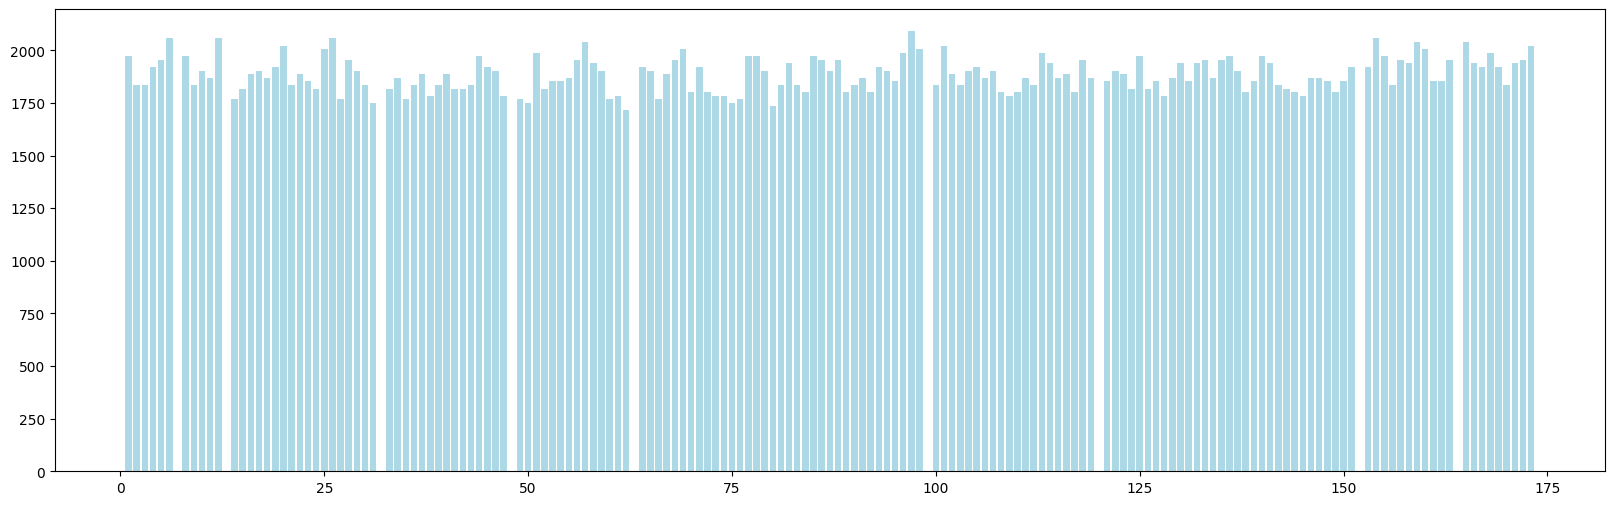

In [49]:
plt.figure(figsize=(20, 6))
# Calculate the sum of all invasive species for each location (row-wise sum)
dataset['row_sum'] = dataset.drop('Trimble_station', axis=1).sum(axis=1)
# creating a bar graph to show the occurances of invasive species per trimble station
plt.bar(dataset['Trimble_station'], dataset['row_sum'], color='lightblue')

#plt.xticks(dataset['Trimble_station'])
plt.show()

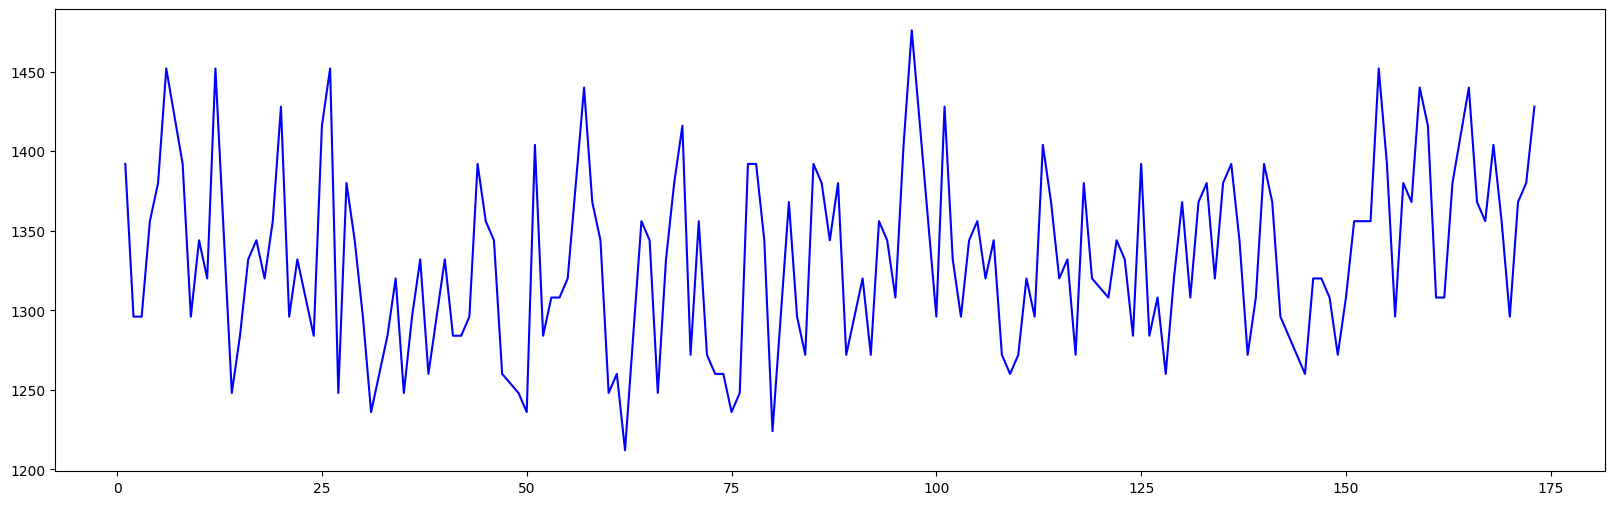

In [44]:
plt.figure(figsize=(20, 6))
# Calculate the sum of all invasive species for each location (row-wise sum)
dataset['row_sum'] = dataset.drop('Trimble_station', axis=1).sum(axis=1)
# creating a bar graph to show the occurances of invasive species per trimble station
plt.plot(dataset['Trimble_station'], dataset['row_sum'], color='blue')

#plt.xticks(dataset['Trimble_station'])
plt.show()

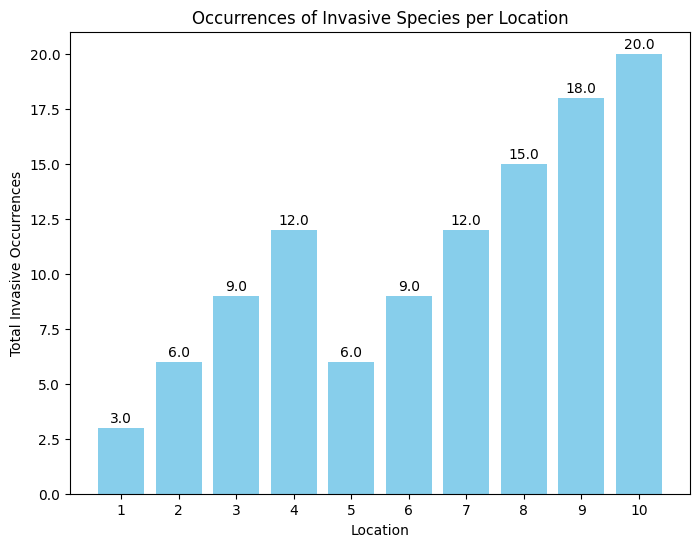

In [41]:

# Sample data with an added "Location" column
data = {
    'Location': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Species1': [2, 4, 6, 8, 1, 3, 5, 7, 9, 10],
    'Species2': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    # Add more columns for other invasive species...
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the sum of all invasive species for each location (row-wise sum)
df['Sum'] = df.drop('Location', axis=1).sum(axis=1)

# Plot the bar graph for occurrences of invasive species per location
plt.figure(figsize=(8, 6))
bars = plt.bar(df['Location'], df['Sum'], color='skyblue')

# Adding title and labels
plt.title('Occurrences of Invasive Species per Location')
plt.xlabel('Location')
plt.ylabel('Total Invasive Occurrences')

# Add the sum values as labels on the bars
for bar in bars:
    height = bar.get_height()  # Get the height of the bar (sum value)
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1,  # Position of the label
             f'{height:.1f}', ha='center', va='bottom')  # The value label

# Display the plot
#plt.tight_layout()
plt.xticks(df['Location'])
plt.show()